<a href="https://colab.research.google.com/github/fmezacr/machinelearning/blob/main/Dise%C3%B1o_de_Redes_Neuronales_Convolutivas_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---

## **Diseño y Entrenamiento de una Red Neuronal Convolutiva (CNN) con MNIST**

### Autor: ***Felipe Meza-Obando***

---

## Introducción
Presentamos cómo diseñar una Red Neuronal Convolutiva (CNN) usando el dataset **MNIST**. Veremos el proceso completo desde la carga y preprocesamiento de los datos, hasta el diseño, entrenamiento y evaluación de la red. Además, analizaremos cómo las capas convolutivas extraen características a medida que aumenta la profundidad de la red.


# Paso 1: Importar las librerías necesarias

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from IPython.display import Image, display
plt.style.use("seaborn-v0_8-pastel")

## Paso 2: Cargar y Preparar el Dataset

El dataset MNIST contiene 60,000 imágenes para entrenamiento y 10,000 imágenes para prueba. Las imágenes son de 28x28 píxeles en escala de grises, representando dígitos del 0 al 9.

In [ ]:
# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar los datos (escala de 0 a 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Redimensionar las imágenes para adaptarlas a la entrada de la CNN (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convertir las etiquetas a formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Paso 3: Visualización de algunas imágenes del dataset
Veamos algunas imágenes del conjunto de entrenamiento para familiarizarnos con los datos.

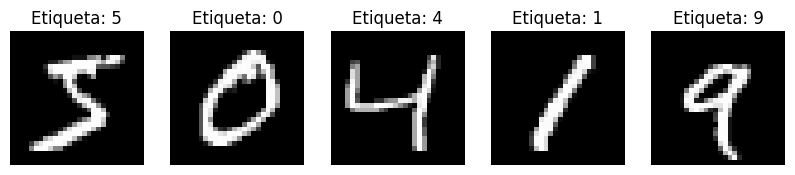

In [ ]:
# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Etiqueta: {np.argmax(y_train[i])}")
plt.show()

## Paso 4: Definir la Arquitectura del Modelo CNN

Diseñamos una CNN con:
1. Capas **Conv2D** para extraer características.
2. **MaxPooling2D** para reducir la dimensionalidad.
3. **Dropout** para prevenir el overfitting.
4. **Dense** con activación Softmax para la salida.

In [ ]:
# Definir la arquitectura del modelo CNN usando Input()
model = Sequential([
    Input(shape=(28, 28, 1)),                               # Definir explícitamente la forma de entrada
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Primera capa convolutiva
    MaxPooling2D(pool_size=(2, 2)),                         # MaxPooling para reducir dimensionalidad
    #Conv2D(64, (3, 3), strides=(2, 2), activation='relu'),  # Segunda capa convolutiva. Versión con stride!
    Conv2D(64, (3, 3), activation='relu'),                  # Segunda capa convolutiva
    MaxPooling2D(pool_size=(2, 2)),                         # Otro MaxPooling
    Flatten(),                                              # Aplanar la salida para las capas densas
    Dense(128, activation='relu'),                          # Capa completamente conectada con 128 neuronas
    Dropout(0.5),                                           # Dropout para prevenir overfitting
    Dense(10, activation='softmax')                         # Capa de salida con 10 clases
])

# Resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## Paso 5: Compilar el Modelo

El optimizador **Adam** se utiliza con la función de pérdida **categorical_crossentropy** porque es un problema de clasificación multicategoría.

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Paso 6: Entrenar el Modelo

Definimos **10 épocas** y un tamaño de lote (**batch size**) de 32. Además, utilizamos un **20% de los datos de entrenamiento** como validación durante el entrenamiento.


In [ ]:
# Entrenar el modelo
import time  # Para medir el tiempo de entrenamiento

start_time = time.time()
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32,
                    verbose=1)
end_time = time.time()

# Calcular el tiempo total de entrenamiento
training_time = end_time - start_time

# Imprimir el tiempo total
minutes, seconds = divmod(training_time, 60)
print(f"Tiempo total de entrenamiento: {int(minutes):02d}:{int(seconds):02d} (mm:ss)")




Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.8503 - loss: 0.4681 - val_accuracy: 0.9813 - val_loss: 0.0636
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9746 - loss: 0.0885 - val_accuracy: 0.9888 - val_loss: 0.0378
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9804 - loss: 0.0674 - val_accuracy: 0.9887 - val_loss: 0.0381
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9900 - val_loss: 0.0349
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9873 - loss: 0.0405 - val_accuracy: 0.9902 - val_loss: 0.0339
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9888 - loss: 0.0351 - val_accuracy: 0.9915 - val_loss: 0.0348
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.9912 - loss: 0.0288 - val_accuracy: 0.9915 - val_loss: 0.0345
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9918 -

## Paso 7: Visualización de las Curvas de Entrenamiento

Veamos las curvas de **precisión** y **pérdida** durante el entrenamiento.

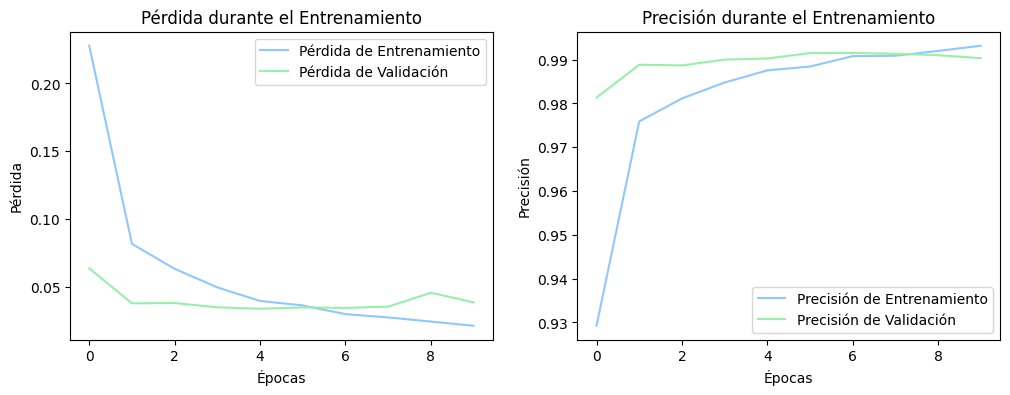

In [ ]:
# Graficar las curvas de pérdida y precisión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Curva de pérdida
ax1.plot(history.history['loss'], label='Pérdida de Entrenamiento')
ax1.plot(history.history['val_loss'], label='Pérdida de Validación')
ax1.set_title('Pérdida durante el Entrenamiento')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida')
ax1.legend()

# Curva de precisión
ax2.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
ax2.plot(history.history['val_accuracy'], label='Precisión de Validación')
ax2.set_title('Precisión durante el Entrenamiento')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Precisión')
ax2.legend()

plt.show()

## Paso 8: Evaluación del Modelo

Evaluamos el modelo con los datos de prueba.

In [ ]:
# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {test_loss:.2f}')
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9896 - loss: 0.0295
Pérdida en el conjunto de prueba: 0.02
Precisión en el conjunto de prueba: 99.21%


## Paso 9: Visualización de Activaciones Internas

Veamos cómo las capas convolutivas transforman las imágenes internamente.

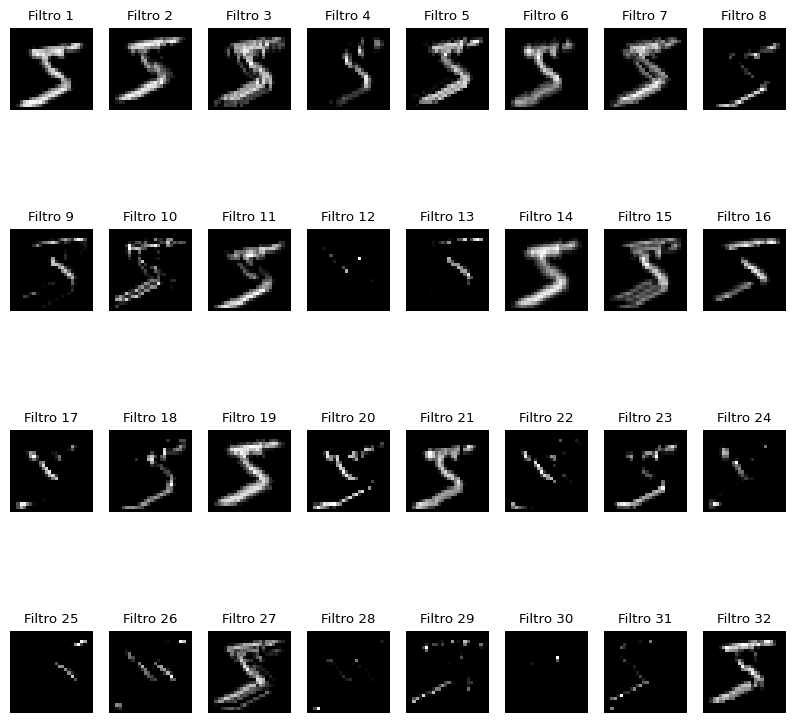

In [ ]:
# Visualizar la imagen
import requests
from IPython.display import Image, display

file_id = "1C5fg5aYT0L9R6_jDbK436M16ugYADJks"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
response = requests.get(url)
with open("imagen_descargada.png", "wb") as f:
    f.write(response.content)
display(Image(filename="imagen_descargada.png", width=700, height=700))


## Conclusión

Diseñamos una CNN para el dataset MNIST y exploramos cómo la red procesa las imágenes internamente. Además, vimos cómo prevenir **overfitting** usando Dropout y cómo evaluar el modelo para asegurar que generaliza bien en el conjunto de prueba.

**Posibles mejoras:**
- Aumentar el número de filtros o capas.
- Usar técnicas de regularización como **Batch Normalization**.
- Experimentar con optimizadores e hiperparámetros.

---

#**Algunos conceptos...**

En las capas convolutivas de **Keras** (y de otras librerías similares), existen varias opciones de **padding** que determinan cómo se maneja el borde de las imágenes o matrices al aplicar un filtro. Esto es crucial, ya que afecta el tamaño de las salidas después de la convolución. A continuación te explico las opciones disponibles:

---

## **Opciones de Padding**

1. ### **`valid` padding (sin padding)**
   - **Descripción**:
     No se agrega padding alrededor de la imagen o matriz de entrada. Esto hace que, después de cada operación de convolución, la dimensión de la salida sea más pequeña que la de la entrada.
   - **Uso**:
     ```python
     Conv2D(32, (3, 3), activation='relu', padding='valid')
     ```
   - **Efecto en la salida**:
     Si la entrada es de \(N \times N\) y se usa un filtro de \(F \times F\), el tamaño de la salida será:
    $$
     \frac{(N - F)}{S} + 1
    $$
     Esto significa que la convolución reduce el tamaño de la matriz de salida.

   **Ejemplo**:  
   Con entrada $28 \times 28$ y filtro $3 \times 3$, la salida será $26 \times 26$.

   - **Ventaja**:
     - Más eficiente, ya que no se hace cálculo adicional.
   - **Desventaja**:
     - Se pierde información en los bordes, ya que no se realiza convolución en las esquinas externas de la matriz.

---

2. ### **`same` padding (padding simétrico)**
   - **Descripción**:
     Agrega padding alrededor de la matriz de entrada para asegurar que el tamaño de salida sea igual al tamaño de la entrada (cuando el **stride** es 1). El padding es calculado de forma que el filtro se pueda aplicar a cada punto, incluso en los bordes.
   - **Uso**:
     ```python
     Conv2D(32, (3, 3), activation='relu', padding='same')
     ```
   - **Efecto en la salida**:
     La dimensión de la salida es la misma que la de la entrada. Por ejemplo, si la entrada es $28 \times 28$ y el filtro es $3 \times 3$, la salida también será $28 \times 28$.

   - **Ventaja**:
     - Mantiene el tamaño original de la entrada, lo cual es útil en redes profundas donde no queremos perder resolución rápidamente.
   - **Desventaja**:
     - Introduce cálculos adicionales debido al padding.

---

## **Comparativa entre `valid` y `same`**

| Opción de Padding | Tamaño de Salida      | Ventaja                       | Desventaja                     |
|-------------------|-----------------------|-------------------------------|--------------------------------|
| `valid`           | Menor que la entrada  | Más rápido y eficiente        | Pierde información de los bordes |
| `same`            | Igual al de la entrada| Conserva el tamaño original   | Más costoso computacionalmente |

---

- **`valid`** se utiliza cuando no necesitas conservar las dimensiones de la entrada.
- **`same`** es ideal para redes profundas donde no quieres que las dimensiones disminuyan rápidamente.
- **`causal`** es útil en series temporales para mantener la causalidad.

Si deseas mantener el tamaño original de las imágenes en tu red neuronal convolutiva (como en MNIST), lo ideal es usar `padding='same'`.

---

# **¿Qué es el `stride`?**

El **`stride`** es un hiperparámetro clave en las capas convolutivas que controla el **número de píxeles que se desplaza el filtro** sobre la entrada en cada paso. Cambiar el `stride` afecta tanto el **tamaño de la salida** como la cantidad de **información espacial** retenida. A continuación, te indico dónde y cómo puedes modificarlo en tu modelo.

### **¿Dónde ajustar el `stride`?**
En tu modelo de red convolutiva, el `stride` se define dentro de la **capa `Conv2D`**. Aquí tienes un ejemplo:

```python
Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1))
```

Puedes experimentar con los valores del **stride** cambiando el argumento `strides`.

- **`strides=(1, 1)`**: El filtro se mueve un píxel por vez (paso más fino, más información).
- **`strides=(2, 2)`**: Se mueve dos píxeles por vez (reduce la dimensión de la salida).
  
---

### **Cuidados importantes al ajustar el stride**
1. **Tamaño de la salida**: Si aumentas el `stride`, el tamaño de la salida se reduce más rápido. Con un `stride` mayor, podrías perder información espacial relevante. Verifica que tu red tenga suficiente **profundidad** para capturar características relevantes.
   
   La fórmula para calcular el tamaño de la salida es:
   $$
   \text{Output Size} = \frac{\text{Input Size} - \text{Filter Size}}{\text{Stride}} + 1
   $$

2. **Relación con el padding**:
   - Usar **`same` padding**: La salida tiene el mismo tamaño que la entrada.
   - Usar **`valid` padding**: No hay padding; el tamaño de la salida se reduce más rápidamente.

3. **Overfitting/Underfitting**:
   - Si reduces demasiado la información espacial con un stride alto, podrías sufrir de **underfitting** (modelo con baja capacidad de aprendizaje).
   - Con un stride bajo y una red muy profunda, podrías tener **overfitting**, por lo que sería útil aplicar **Dropout**.

---

Modificar el **stride** es una forma poderosa de controlar la dimensionalidad de tu red y el equilibrio entre la información espacial y la profundidad. Experimenta con diferentes valores, pero ten cuidado con el tamaño de la salida y cómo se ve afectado tu modelo.